# Breast Cancer Prediction with Logistic Regression using threshold Tuning

### 0. Motivation

Breast cancer is the most common type of cancer in women around the world and the second highest in terms of mortality rates, and is normally detected when an abnormal lump or a tiny speck of calcium are found (from self-examination or x-ray). Early detection of this kind of cancer can greatly improve survival chances by promoding clinical treatment to patients as soon as possible. That said, the main purpose of this post is to predict wether a lump is benign or malign through data analysis.

All Information and data related to this problem can be found here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/

### 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###   2. Load dataset

In [2]:

dataset = pd.read_csv('breast.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


 ### 3.  Exploratary data analysis

#### 3.1checking missing values

In [3]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

here we are droping the columns 32 cause it's contain NAn values which is irrelavent

In [4]:
dataset1 = dataset.drop(["Unnamed: 32"], axis = 1)
dataset1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:

dataset1.isnull().values.any()

False

 !Perfect now we don't have any null value in dataset & we are going to check the datatype in dataset1

###  3.2   checking the datatype &  Getting information of cancer DataFrame using ‘.info()‘ method

In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- We have a total of non-null 569 patients’ information with 31 features. All feature data types in the float. The size of the DataFrame is 142.4 KB.

- Numerical distribution of data. We can know to mean, standard deviation, min, max, 25%,50% and 75% value of each feature.

 Here we have 'diagnosis' Column in dataset,datatype of that particular column is 'categories' & it is our target variable
 later we will convert this  into numeric data using LabelEncoder

###   3.3  Descriptive Statistical Analysis

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [7]:
dataset1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We have clean and well formated DataFrame, so DataFrame is ready to visualize.

####   3.4 get correlations of each features in dataset

To find a correlation between each feature and target we visualize heatmap using the correlation matrix.

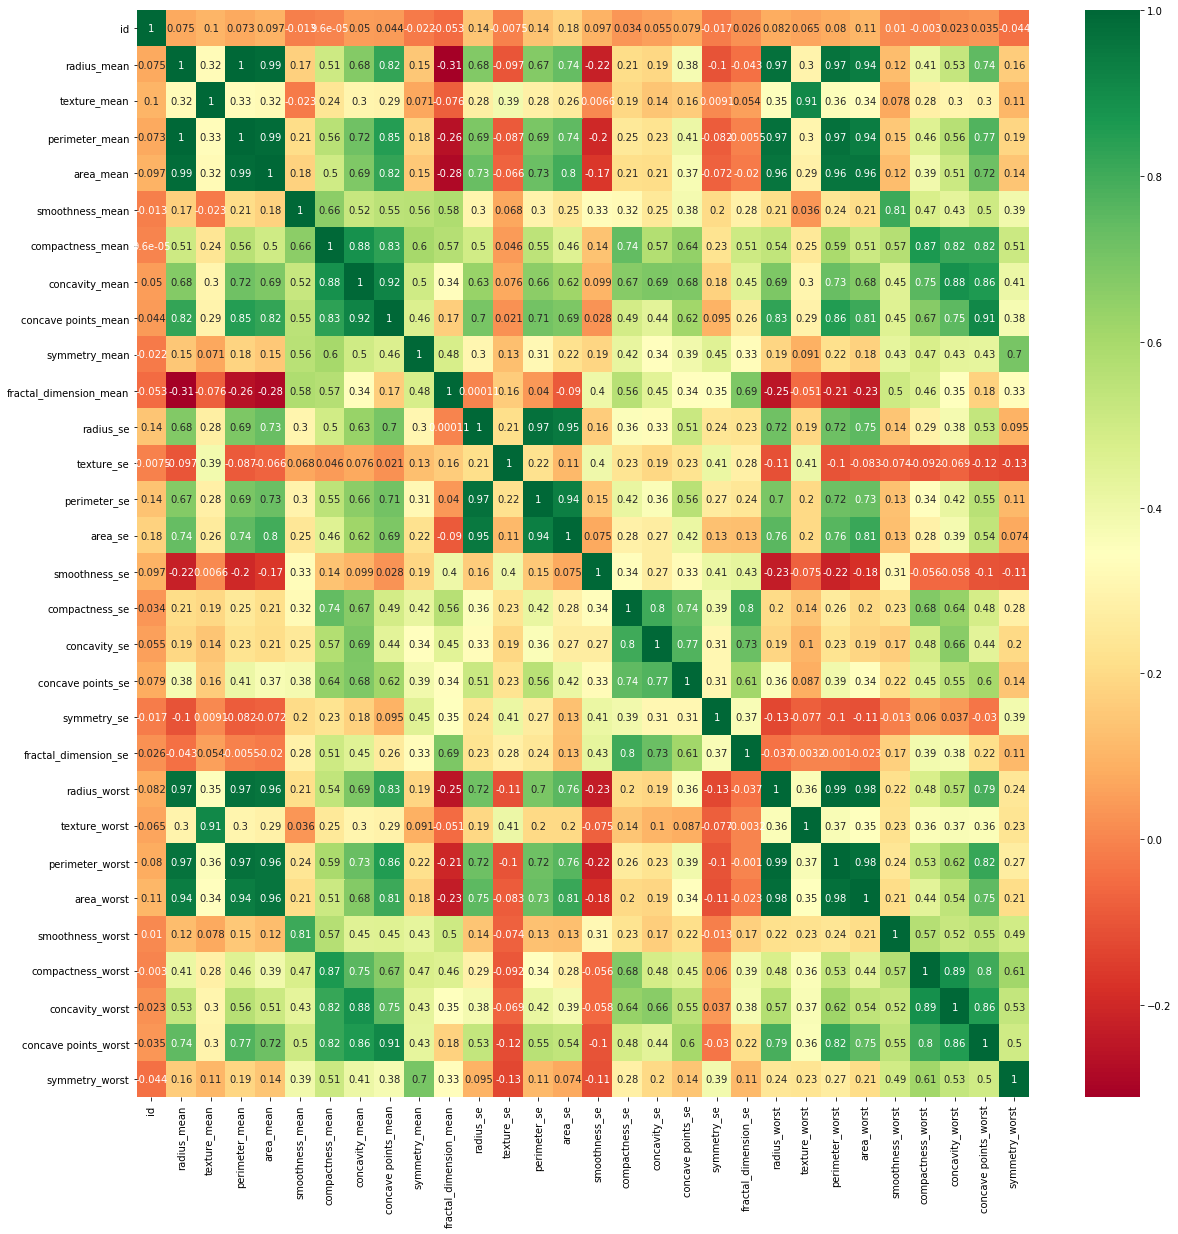

In [8]:
#plot heat map
plt.figure(figsize=(20,20))
sns.heatmap(dataset.iloc[:,0:31].corr(),annot=True,cmap="RdYlGn")


## 2. Data Preprocessing

###  2.1 indepenent dataset & dependent dataset

In [9]:
X = dataset1.drop(['diagnosis'],axis = 1)
y = dataset1['diagnosis']
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Note : here y(dependent dataset) have category (Benign, Malignant) we have to convert this into numeric data. For this we have to use LabelEncoder

### 2.2 Applying Labelencoder 

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### 2.3  Visualizing  the size of Benign & Malignant

0    357
1    212
dtype: int64

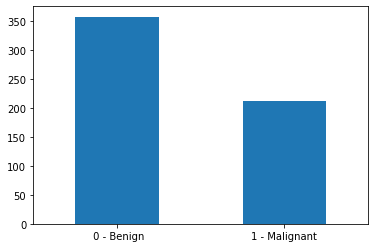

In [12]:
value_counts = pd.value_counts(y,sort = True)
value_counts.plot(kind = 'bar', rot = 0)
Label = [' 0 - Benign', '1 - Malignant']
plt.xticks(range(2), Label)
value_counts

Benign: The tumor doesn’t contain cancerous cells.

Malignant: The tumor contains cancerous cells

### 2.4 splitting data into train and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 1/3, random_state = 10)

###  2.5 Feature scaling

In [14]:

from sklearn.preprocessing import StandardScaler
sc=  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)


In [15]:
print(X_train)

[[-0.17884936  1.25786022  0.17516809 ...  0.19221396 -0.56831216
  -1.49604797]
 [-0.24014027 -1.05136303 -0.98445994 ... -0.3714209   0.22904509
   0.69112758]
 [-0.24050654  1.29389851  0.48362914 ...  0.96080695 -0.59647489
  -1.01933434]
 ...
 [ 0.45595516 -0.53573816 -1.61297833 ... -0.15559378  0.38746044
  -0.45813274]
 [-0.24642573 -0.11713946 -0.46726584 ... -1.02449203 -0.92562678
  -0.68753718]
 [ 0.43437157  1.79011816  2.75881932 ...  0.75895425 -0.03850083
  -0.10787132]]


In [16]:
print(X_test)

[[-0.24642112  0.329181   -1.70111005 ...  1.01981005  0.57403852
   0.94515104]
 [-0.24001061 -1.36933171  0.62974227 ... -1.41888116 -0.80065467
  -0.56947782]
 [-0.1780734  -0.16149429 -0.73166103 ... -0.73211615  0.76237677
  -0.39714473]
 ...
 [-0.24015726 -0.39435714  0.49754468 ... -0.94732219 -0.70736563
  -0.14535936]
 [-0.24055972  0.79490669 -0.65512558 ...  2.14242163  2.07018347
   1.21931732]
 [-0.24025013 -0.74087924  1.22115256 ... -1.06936544  0.62332329
  -0.93204875]]


# 3. Modeling

###  3.1 applying Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 3.2 Predict the test set results

In [18]:
y_pred  = classifier.predict(X_test)

## 4. Evaluate the prediction & performance 

###  4.1 comparision score of  train and test set

In [19]:
print("training  set accuracy : {}".format(classifier.score(X_train,y_train)*100))
print("test set accuracy : {}".format(classifier.score(X_test,y_test)*100))

training  set accuracy : 98.68073878627969
test set accuracy : 97.36842105263158


### 4.2 creating confusion_marix and accuracy

In the Confusion Matrix example, we built a logistic regression classifier to predict whether the state of breast cancer is malignant or benign. We observed the confusion matrix as shown below.



In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
#   [TN , FP
#    FN , TP]

[[122   3]
 [  2  63]]
0.9736842105263158


- Here we get good accuracy using logistic Model But here if we look at the confusion matrix here model prediced '2' person don't have cancer(Malignant) which is not good or dangerous for the person have cancerous cells but our model predicted as Bengin(not cancer cell)
- We can solve this problem by changing the Threshold value in the Model. By default Logisitic Model thershold is 0.5, But we can tune up.

## 5 find best threshold to optimize the model

In [21]:
y_proba  = classifier.predict_proba(X_test)[:,1]

### 5.1 Set the threshold at different-different point and see the result at which thershold our Model improved and give us 0 - FN(Flase Negative) as result

In [22]:
y_pred_th4 = np.where(classifier.predict_proba(X_test)[:,1]>0.4,1,0) # when  threshold is 0.4

y_pred_th3 = np.where(classifier.predict_proba(X_test)[:,1]>0.3,1,0) #  when threshold is 0.3

y_pred_th2 = np.where(classifier.predict_proba(X_test)[:,1]>0.26,1,0) #  when threshold is 0.26

y_pred_th1 = np.where(classifier.predict_proba(X_test)[:,1]>0.1,1,0) #  when threshold is 0.1


As we can see, clearly the classifier has improved. Compare it with the previous Confusion Matrix given below:

### 5.3 evaluate the final result with tuned Threshold value

In [23]:
ct = pd.crosstab(y_test,y_pred_th2)
ct

col_0,0,1
row_0,,
0,116,9
1,0,65


Note:
- True Positive is 65
- True Negative is 116
- False Positive is 9
- False Negative is 0

- we sucessfully achieve the desire result here FN = 0, and in the previous result was FN = 2

## 5.4 Cross validation to final result

In [24]:

from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = classifier, X = X_train,y = y_train, cv = 10)
print("\nCross validation mean accuracy of Logistic Regression = ", cross_validation.mean())
print("\nCross validation std. of Logistic Regression = ", cross_validation.std())
cross_val_res = pd.DataFrame(cross_validation*100)


Cross validation mean accuracy of Logistic Regression =  0.9655049786628733

Cross validation std. of Logistic Regression =  0.03598081823009075


In [25]:
cross_val_res

,0
0,100.000000
1,97.368421
2,97.368421
3,94.736842
4,100.000000
5,92.105263
6,100.000000
7,100.000000
8,94.736842
9,89.189189


###  5.4  Applying ROC Curve

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
fpr,tpr, thresholds = roc_curve(y_test, y_proba)

- False Positive Rate:
False Positive Rate is the proportion of observations that are incorrectly predicted to be positive.

In [28]:

fpr

array([0.   , 0.   , 0.   , 0.008, 0.008, 0.032, 0.032, 0.072, 0.072,
       1.   ])

- True Positive Rate:
True Positive Rate is the proportion of observations that are correctly predicted to be positive.


In [29]:
tpr

array([0.        , 0.01538462, 0.92307692, 0.92307692, 0.96923077,
       0.96923077, 0.98461538, 0.98461538, 1.        , 1.        ])

- Thresholds values

In [30]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 7.34644395e-01, 7.32819970e-01,
       6.47806266e-01, 4.75785891e-01, 3.59538344e-01, 2.61111311e-01,
       2.60956974e-01, 4.83946269e-07])

 + For AUC use roc_auc_score() python function for ROC


In [31]:
s = roc_auc_score(y_test, y_proba)
s

0.9980307692307693

## 6.  Visualizing the final result using ROC Curve

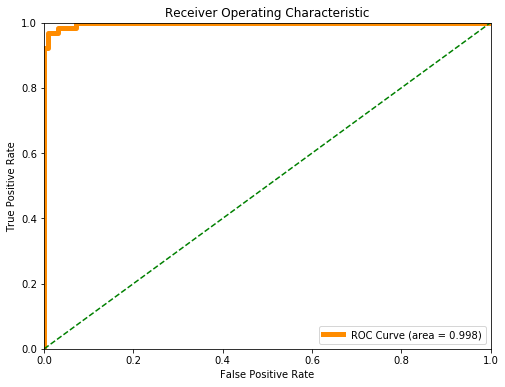

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
from sklearn.metrics import  roc_curve, roc_auc_score
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr, color = 'darkorange', linewidth = 5, label = 'ROC Curve (area = %0.3f)' % (s))
plt.plot([0,1],[0,1], 'g--')

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')

## 7. Conclusion:

- here initially we build a modle with 97% accuracy using Logisitic Regression. but there are some FN(false Negative values) means patients those  have Cancer(Malignant) are predicted as non-cancer(Benign) . Which is very dangerous for the patients. we tuned the thershold value 0.5 to 0.26.and we successfully reach to desire output with FN-'0' . 